> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string 
```

In [18]:
### DATABASE
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',12)

wcwomen_df = pd.read_csv('https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv')
wcmen_df   = pd.read_csv('https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv')
wc = pd.concat((wcwomen_df,wcmen_df)).reset_index()

nomes_traduzidos = {'home_team': 'time_1', 'away_team': 'time_2', 'home_score': 'gols_1', 'away_score': 'gols_2',
                    'Date': 'data', 'Year': 'ano', 'Host': 'país_sede', 'Attendance': 'comparecimento',
                    'Score': 'resultado', 'Round': 'rodada', 'home_goal': 'gols_1_detalhes', 'away_goal': 'gols_2_detalhes',
                    'home_own_goal': 'gols_1_contra', 'away_own_goal': 'gols_2_contra',
                    'home_penalty_goal': 'gols_1_penalti', 'away_penalty_goal': 'gols_2_penalti',
                    'home_red_card': 'cartao_vermelho_1', 'away_red_card': 'cartao_vermelho_2',
                    'home_yellow_card_long': 'cartao_amarelo_1', 'away_yellow_card_long': 'cartao_amarelo_2'}

wc = wc.loc[:, nomes_traduzidos.keys()]
wc.columns = nomes_traduzidos.values()

copa = wc['ano'].apply( lambda x: 'Masculina' if x % 2 == 0 else 'Feminina').astype('string')
wc['copa'] = copa


#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização. 

In [19]:
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

#seaborn
import seaborn as sns

sns.set_style("darkgrid", rc={"grid.linestyle": "dashed"})

#plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

pio.templates.default = "plotly_dark"

#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [20]:
### Tratamentos dos dados
print(f'Num linhas anterior: {len(wc)}')

wc_comp = df_filtered = wc[wc['comparecimento'] != 0].reset_index(drop=True)
#nova tabela sem as linhas em que o comparecimento tem valor 0

print(f'Num linhas atual: {len(wc_comp)}')

Num linhas anterior: 1312
Num linhas atual: 1286


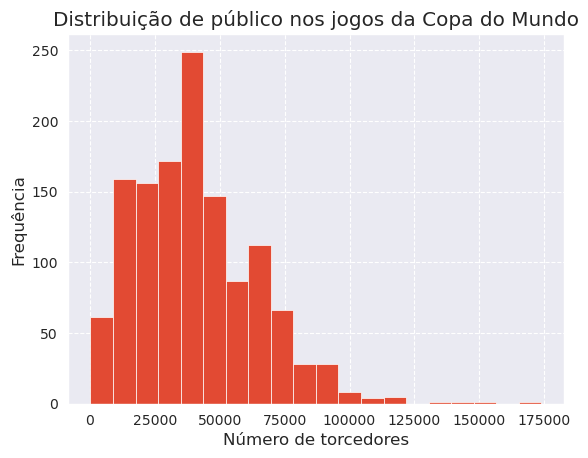

In [21]:
#### Solução com matplotlib

plt.hist(wc_comp['comparecimento'], bins=20, linewidth=0.5)

plt.title("Distribuição de público nos jogos da Copa do Mundo")
plt.xlabel("Número de torcedores", fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

[Text(0.5, 1.0, 'Distribuição de público nos jogos da Copa do Mundo'),
 Text(0.5, 0, 'Número de torcedores'),
 Text(0, 0.5, 'Frequência')]

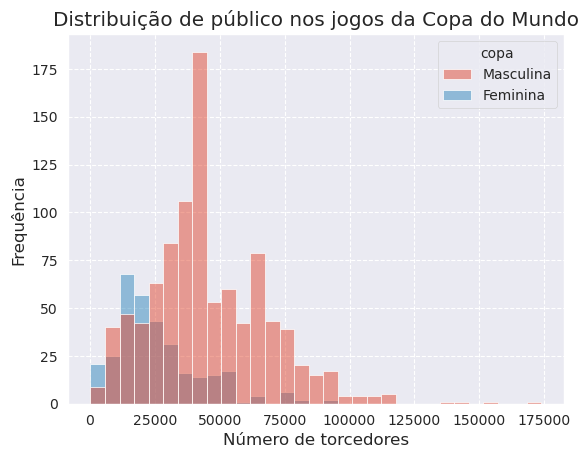

In [22]:
#### solução com seaborn

sns.histplot(data=wc_comp, x='comparecimento', hue='copa').set(
    title= 'Distribuição de público nos jogos da Copa do Mundo',
    xlabel = 'Número de torcedores',
    ylabel = 'Frequência'
)

#diferença de público entre masculino e femino

In [23]:
#### solução com plotly

col1 = wc_comp[(wc_comp["copa"] == 'Masculina')]
col2 = wc_comp[(wc_comp["copa"] == 'Feminina')]
               
fig = go.Figure()
fig.add_trace(go.Histogram(x=col1['comparecimento'], name='Masculina'))
fig.add_trace(go.Histogram(x=col2['comparecimento'], name='Feminina'))
               
fig.update_layout(barmode='overlay')

fig.update_traces(opacity=0.75)
fig.show()


#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

In [25]:
import numpy as np

# Tratamento de dados
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))

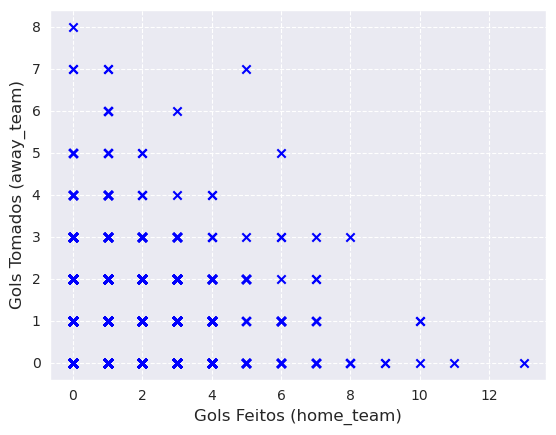

In [26]:
#### solução com matplotlib
gols1 = wc['gols_1']
gols2 = wc['gols_2']

plt.scatter(gols1, gols2, color='blue', marker='x')
plt.xlabel('Gols Feitos (home_team)')
plt.ylabel('Gols Tomados (away_team)')
plt.grid(True)
plt.show()

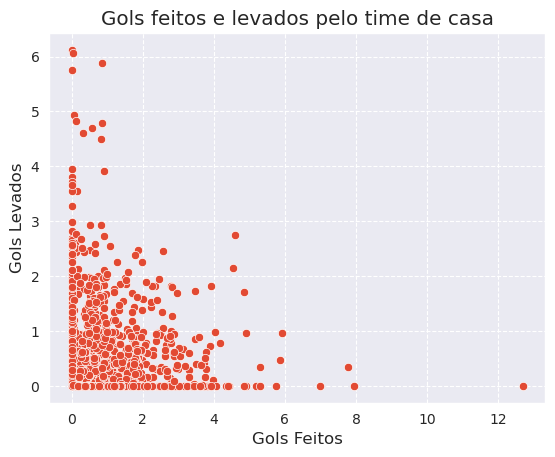

In [27]:
#### solução com seaborn
sns.scatterplot(data=gols, x='gols_1', y='gols_2').set(
    title= 'Gols feitos e levados pelo time de casa',
    xlabel = 'Gols Feitos',
    ylabel = 'Gols Levados'
)

plt.autoscale()

plt.show()

In [28]:
#### solução com plotly

fig = px.scatter(gols, x='gols_1', y='gols_2')
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

In [29]:
### Processamento dos dados
#DATAFRAME
participacao = {
    "pais": [],
    "copa": [],
    "num_copas": []
}


#FILTRAGEM
#lista com todos os países que já participaram
lista_paises = []

nomes_paises = wc["time_1"].drop_duplicates() #buscando a coluna com o nome dos países sem repeti-los

for linha in nomes_paises:
    lista_paises.append(linha)
    
###print(lista_paises)

#resgatar quantas participações o país teve
wc_filtrado = wc[["time_1", "ano", "copa"]].drop_duplicates() #busca o nome dos países participantes em cada ano

#PROCESSAMENTO
#looping para adicionar ao dataframe informações de cada país que já participou da copa
for pais in lista_paises:
    #Masculino
    participacoes_pais = (wc_filtrado[(wc_filtrado["time_1"] == pais) & (wc_filtrado["copa"] == "Masculina")])
    ###print(f"{pais}: {len(participacoes_pais)}")
    if len(participacoes_pais) > 0: #alguns países só participaram da copa Feminina
        participacao['pais'].append(pais)
        participacao['copa'].append("Masculina")
        participacao['num_copas'].append(len(participacoes_pais)) 
        
    #Feminino
    participacoes_pais = (wc_filtrado[(wc_filtrado["time_1"] == pais) & (wc_filtrado["copa"] == "Feminina")])
    ###print(f"{pais}: {len(participacoes_pais)}")
    if len(participacoes_pais) > 0: #alguns países só participaram da copa Masculina
        participacao['pais'].append(pais)
        participacao['copa'].append("Feminina")
        participacao['num_copas'].append(len(participacoes_pais)) 

#RESULTADO 
df = pd.DataFrame(participacao) #database completa

#TOP 5 FEMININO
top10_fem = df[df["copa"] == 'Feminina'].sort_values(by='num_copas', ascending=False).head(10).reset_index(drop=True)
top10_fem.index = top10_fem.index + 1 #para começar a contar do 1
display(top10_fem)

#TOP 5 MASCULINO
top10_mas = df[df["copa"] == 'Masculina'].sort_values(by='num_copas', ascending=False).head(10).reset_index(drop=True)
top10_mas.index = top10_mas.index + 1
display(top10_mas)

,pais,copa,num_copas
1,Brazil,Feminina,9
2,Sweden,Feminina,9
3,United States,Feminina,9
4,Germany,Feminina,9
5,Norway,Feminina,9
6,Japan,Feminina,8
7,Nigeria,Feminina,8
8,China PR,Feminina,8
9,Canada,Feminina,7
10,Australia,Feminina,7


,pais,copa,num_copas
1,Brazil,Masculina,21
2,Italy,Masculina,18
3,Argentina,Masculina,17
4,England,Masculina,16
5,Spain,Masculina,16
6,France,Masculina,15
7,Uruguay,Masculina,14
8,Sweden,Masculina,12
9,Mexico,Masculina,11
10,Belgium,Masculina,10


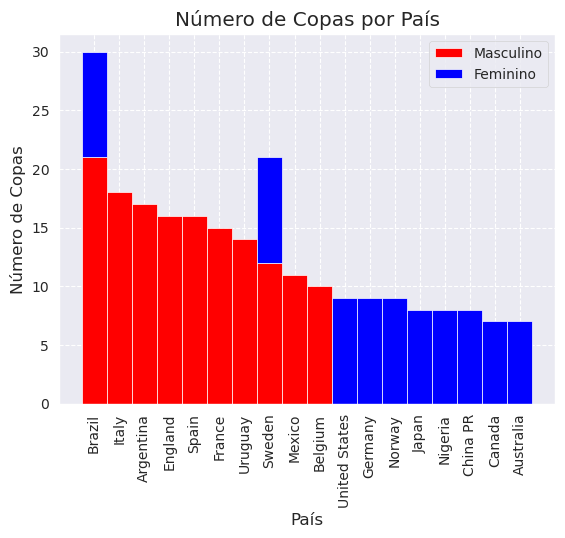

In [30]:
#### solução com matplotlib
plt.bar(top10_mas['pais'], top10_mas['num_copas'], color='r', width=1, label='Masculino')

#lista dos países
paises_m = list(top10_mas['pais'])
paises_f_total = list(top10_fem['pais'])
paises_r = [item for item in paises_m if item in paises_f_total]  # Lista com os países em comum
paises_f = [item for item in paises_f_total if item not in paises_m]#Lista de países que venceram apenas a Feminina

#apenas femino
femino_apenas = top10_fem[top10_fem['pais'].isin(paises_f)]
plt.bar(femino_apenas['pais'], femino_apenas['num_copas'], color='b', width=1, label='Feminino')
#coluna para aqueles paises que venceram apenas no feminino 
    
#ambas as copas
ambas_copas = top10_fem[top10_fem['pais'].isin(paises_r)]
plt.bar(ambas_copas['pais'], ambas_copas['num_copas'], color='b', width=1, bottom=top10_mas.loc[top10_mas['pais'].isin(ambas_copas['pais']), 'num_copas'])
#nova coluna criada acima da de masculina para aquelas países que venceram essa copa

plt.xticks(rotation=90)
plt.xlabel('País')  
plt.ylabel('Número de Copas')  
plt.title('Número de Copas por País')  
plt.legend()

plt.show()

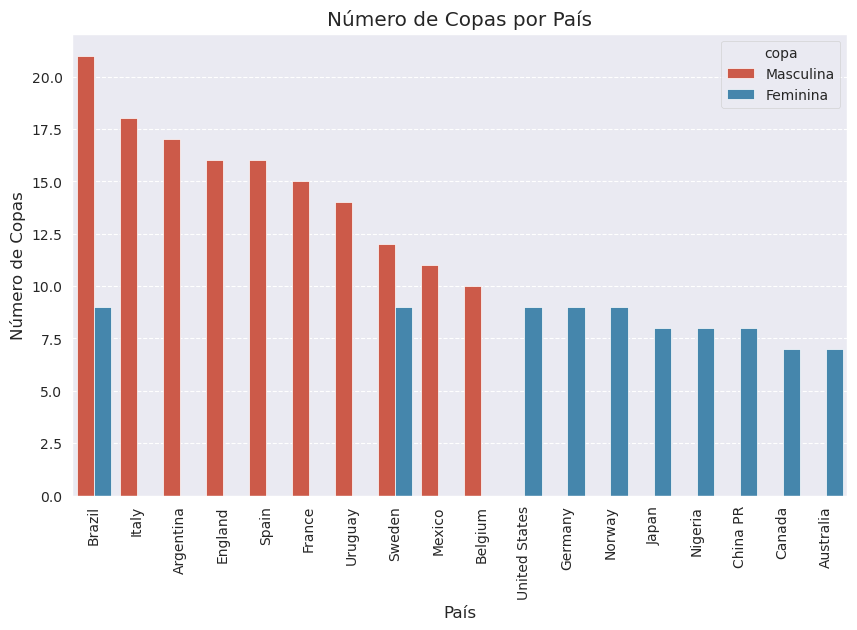

In [31]:
#### solução com seaborn

#unindo o dataframe
top10 = pd.concat([top10_mas, top10_fem])

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='pais', y='num_copas', hue='copa', legend=True)

plt.xlabel('País')
plt.ylabel('Número de Copas')
plt.xticks(rotation=90)

ax = plt.gca()
ax.set_title("Número de Copas por País")

plt.show()

In [32]:
#### solução com plotly

#unindo o dataframe
top10 = pd.concat([top10_mas, top10_fem])

fig = px.bar(top10, x="pais", y="num_copas", color='copa', hover_data=['copa', 'num_copas'], title="Número de Copas por País")
fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

In [8]:
#SUBPLOTS
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [9]:
#GRAFICO 1

wc_ano = wc
wc_ano.rename(columns={'time_1': 'quantidade_jogos'}, inplace=True) #altera o nome de alguma coluna
wc_ano = wc_ano.groupby(['ano', 'país_sede'])['quantidade_jogos'].count() #conta quantas linhas tem o mesmo ano
#conserva as duas colunas que viraram index

wc_ano = wc_ano.reset_index() #retira as colunas 'ano' e 'país_sede' como index

copa = wc_ano['ano'].apply( lambda x: 'Masculina' if x % 2 == 0 else 'Feminina').astype('string') 
wc_ano['copa'] = copa #adicionando uma coluna para ver se é copa M ou F

In [10]:
#GRAFICO 2

#TIME 1
wc_gols = wc[['ano', 'gols_1']]

wc_gols = wc_gols.groupby(['ano']).sum()

wc_gols = wc_gols.reset_index()

gols_home = wc_gols['ano'].apply( lambda x: 'home').astype('string') 
wc_gols['time'] = gols_home 

wc_gols.rename(columns={'gols_1': 'gols'}, inplace=True)

#TIME 2

wc_gols2 = wc[['ano', 'gols_2']]

wc_gols2 = wc_gols2.groupby(['ano']).sum()

wc_gols2 = wc_gols2.reset_index()

gols_away = wc_gols2['ano'].apply( lambda x: 'away').astype('string') 
wc_gols2['time'] = gols_away 

wc_gols2.rename(columns={'gols_2': 'gols'}, inplace=True)

#TOTAL
gols = pd.concat((wc_gols,wc_gols2)).reset_index()


In [11]:
#GRAFICO 3

#CARTÃO AMARELO

#time1
wc_amarelo1 = wc[['ano', 'cartao_amarelo_1']].dropna()

#tratamento de dados
wc_amarelo1["cartao_amarelo_1"] = wc_amarelo1["cartao_amarelo_1"].apply(lambda x: x.split(","))

#contando o numero de cartão
wc_amarelo1["quantidade_cartao_1"] = wc_amarelo1["cartao_amarelo_1"].apply(len)

#time2
wc_amarelo2 = wc[['ano', 'cartao_amarelo_2']].dropna()

wc_amarelo2["cartao_amarelo_2"] = wc_amarelo2["cartao_amarelo_2"].apply(lambda x: x.split(","))

wc_amarelo2["quantidade_cartao_2"] = wc_amarelo2["cartao_amarelo_2"].apply(len)


df_amarelo1 = wc_amarelo1[['ano', 'quantidade_cartao_1']].groupby(['ano']).count()
df_amarelo2 = wc_amarelo2[['ano', 'quantidade_cartao_2']].groupby(['ano']).count()
amarelo_merged = pd.merge(df_amarelo1, df_amarelo2,  on='ano', how='outer')
amarelo_merged["quantidade_cartao_1"].fillna(0, inplace = True) 
amarelo_merged["quantidade_cartao_2"].fillna(0, inplace = True)
#troca os NaN por zero para não atrapalhar na operação futura
amarelo_merged['total_amarelo'] = amarelo_merged['quantidade_cartao_1'] + amarelo_merged['quantidade_cartao_2']

tipo_cartao = amarelo_merged['total_amarelo'].apply( lambda x: 'Amarelo').astype('string')
amarelo_merged['cartao'] = tipo_cartao 
amarelo_merged.rename(columns={'total_amarelo': 'total_cartao'}, inplace=True)
amarelo_merged = amarelo_merged[['total_cartao', 'cartao']]
amarelo_merged = amarelo_merged.reset_index()

#CARTÃO VERMELHO

wc_vermelho1 = wc[['ano', 'cartao_vermelho_1']].dropna()
wc_vermelho1["cartao_vermelho_1"] = wc_vermelho1["cartao_vermelho_1"].apply(lambda x: x.split(","))
wc_vermelho1["quantidade_cartao_1"] = wc_vermelho1["cartao_vermelho_1"].apply(len)

#time2
wc_vermelho2 = wc[['ano', 'cartao_vermelho_2']].dropna()
wc_vermelho2["cartao_amarelo_2"] = wc_vermelho2["cartao_vermelho_2"].apply(lambda x: x.split(","))
wc_vermelho2["quantidade_cartao_2"] = wc_vermelho2["cartao_vermelho_2"].apply(len)


df_vermelho1 = wc_vermelho1[['ano', 'quantidade_cartao_1']].groupby(['ano']).count()
df_vermelho2 = wc_vermelho2[['ano', 'quantidade_cartao_2']].groupby(['ano']).count()
vermelho_merged = pd.merge(df_vermelho1, df_vermelho2,  on='ano', how='outer')
vermelho_merged["quantidade_cartao_1"].fillna(0, inplace = True) 
vermelho_merged["quantidade_cartao_2"].fillna(0, inplace = True)
vermelho_merged['total_vermelho'] = vermelho_merged['quantidade_cartao_1'] + vermelho_merged['quantidade_cartao_2']

tipo_cartao = vermelho_merged['total_vermelho'].apply( lambda x: 'Vermelho').astype('string')
vermelho_merged['cartao'] = tipo_cartao 
vermelho_merged.rename(columns={'total_vermelho': 'total_cartao'}, inplace=True)
vermelho_merged = vermelho_merged[['total_cartao', 'cartao']]
vermelho_merged = vermelho_merged.reset_index()


#INTERLUDIO
cartoes = pd.concat((amarelo_merged,vermelho_merged)).reset_index()
display(cartoes)


,index,ano,total_cartao,cartao
0,0,1950,1.0,Amarelo
1,1,1962,1.0,Amarelo
2,2,1966,18.0,Amarelo
3,3,1970,31.0,Amarelo
4,4,1974,51.0,Amarelo
...,...,...,...,...
49,23,1978,2.0,Vermelho
50,24,1999,4.0,Vermelho
51,25,2003,1.0,Vermelho
52,26,2015,2.0,Vermelho


In [12]:
#GRAFICO 4


#Tratamento de dados
#TIME 1
wc_golsContra = wc[['ano', 'gols_1_contra']].dropna()
#retira os jogos sem gols contra no time 1

wc_golsContra['gols_1_contra'] = wc_golsContra['gols_1_contra'].apply(lambda x: x.split("|"))
#separa cada gol

wc_golsContra['gols_1_contra'] = wc_golsContra['gols_1_contra'].apply(len)
#conta quantos gols foram no jogo

wc_golsContra = wc_golsContra.groupby(['ano']).count()
#Agrupa por ano


#TIME 2
wc_golsContra2 = wc[['ano', 'gols_2_contra']].dropna()
#retira os jogos sem gols contra no time 2

wc_golsContra2['gols_2_contra'] = wc_golsContra2['gols_2_contra'].apply(lambda x: x.split("|"))
wc_golsContra2['gols_2_contra'] = wc_golsContra2['gols_2_contra'].apply(len)
wc_golsContra2 = wc_golsContra2.groupby(['ano']).count()

wc_golsContra2 = wc_golsContra2.reset_index() #retira as colunas 'ano' como index


#TOTAL
df_merged = pd.merge(wc_golsContra, wc_golsContra2,  on='ano', how='outer')
#coloca na mesma linha todos os anos, caso não tenha correspondência, vira NaN
df_merged["gols_1_contra"].fillna(0, inplace = True) 
df_merged["gols_2_contra"].fillna(0, inplace = True)
#troca os NaN por zero para não atrapalhar na operação futura

lista_total = []
for index, row in df_merged.iterrows():
    lista_total.append(row['gols_1_contra'] + row['gols_2_contra'])

df_merged['soma_gols'] = lista_total

copa = df_merged['ano'].apply( lambda x: 'Masculina' if x % 2 == 0 else 'Feminina').astype('string') 
df_merged['copa'] = copa #adicionando uma coluna para ver se é copa M ou F


In [13]:
#VISUALIZAÇÃO
fig = make_subplots(rows=2, cols=2)

# Primeiro gráfico 
fig1 = px.bar(wc_ano, x='ano', y='quantidade_jogos', color='copa', hover_data=['país_sede'], title="Número de jogos em cada copa")
# Adicionar ao subplot
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Segundo gráfico 
fig2 = px.area(gols, x="ano", y="gols", color="time", title='Total de gols por copa')
# Adicionar ao subplot
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)

# Terceiro gráfico 
fig3 = px.area(cartoes, x="ano", y="total_cartao", color="cartao", title='Total de cartões por copa')
# Adicionar ao subplot
for trace in fig3.data:
    fig.add_trace(trace, row=2, col=1)

# Quarto gráfico 
fig4 = px.bar(df_merged, x='ano', y='soma_gols', color='copa', title="Total de gols contra nos anos")
# Adicionar ao subplot
for trace in fig4.data:
    fig.add_trace(trace, row=2, col=2)

# Exibir o gráfico
fig.update_layout(title_text="Subplots de Análises das Copas do Mundo")
fig.show()